In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## 1. Deliverable -1  (Exploratory data quality report reflecting the following) 

 
### a. Univariate analysis :
Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers 

In [3]:
data.shape

(1030, 9)

In [4]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.isin(["NaN"]).any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [9]:
data.skew(axis = 1, skipna = True)

0       1.501376
1       1.656966
2       1.428452
3       1.454175
4       1.673419
          ...   
1025    1.514958
1026    1.038994
1027    1.391064
1028    1.220244
1029    1.437394
Length: 1030, dtype: float64

### b. Bi-variate analysis :
Between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes 

In [10]:
X = data.drop('strength', axis = 1)
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


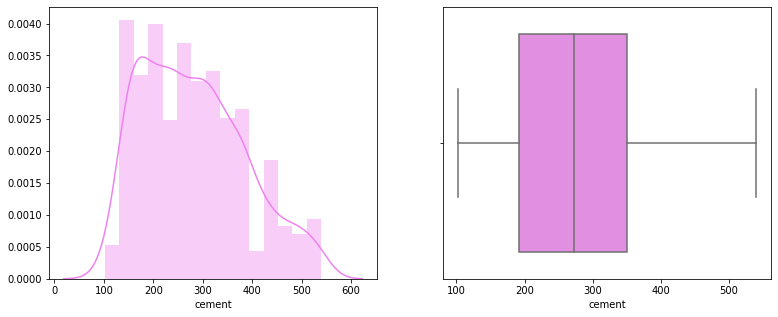

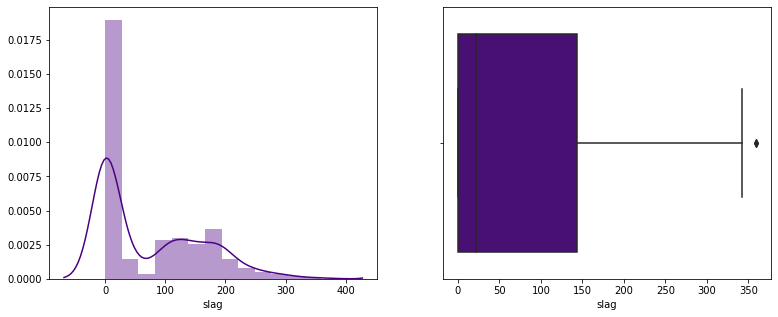

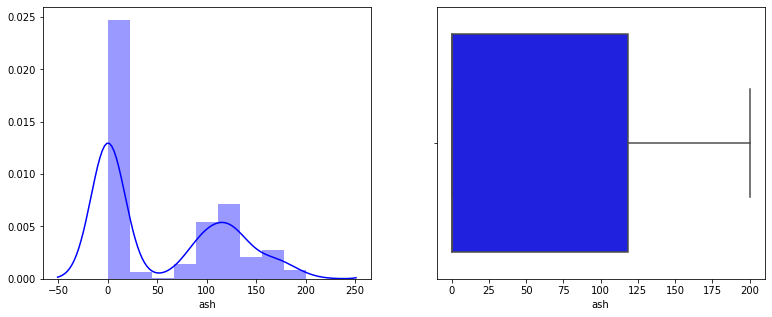

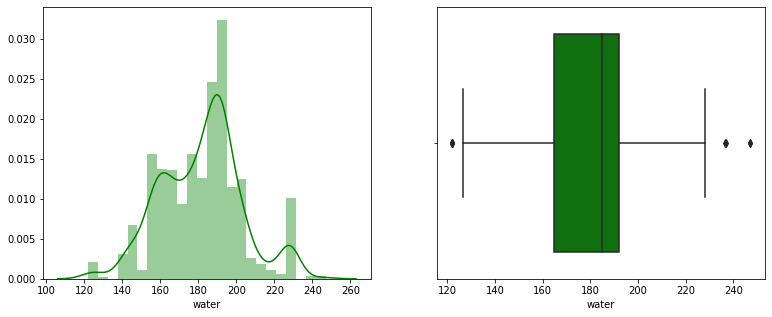

In [11]:
# finding the distribution of each variable
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["cement"], color = "violet")
plt.subplot(1,3,2)
sn.boxplot(data["cement"], color = 'violet')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["slag"], color = "indigo")
plt.subplot(1,3,2)
sn.boxplot(data["slag"], color = 'indigo')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["ash"], color = "blue")
plt.subplot(1,3,2)
sn.boxplot(data["ash"], color = 'blue')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["water"], color = "green")
plt.subplot(1,3,2)
sn.boxplot(data["water"], color = 'green')
plt.show()



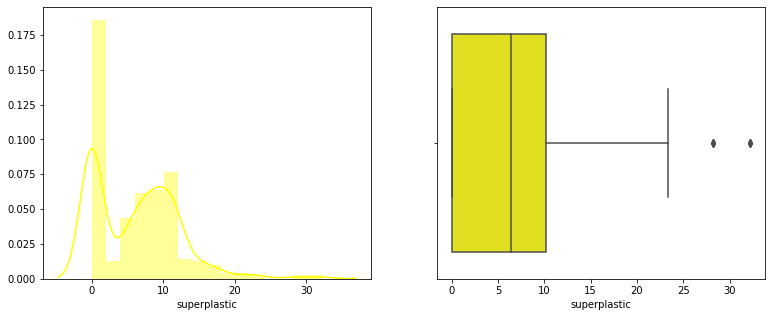

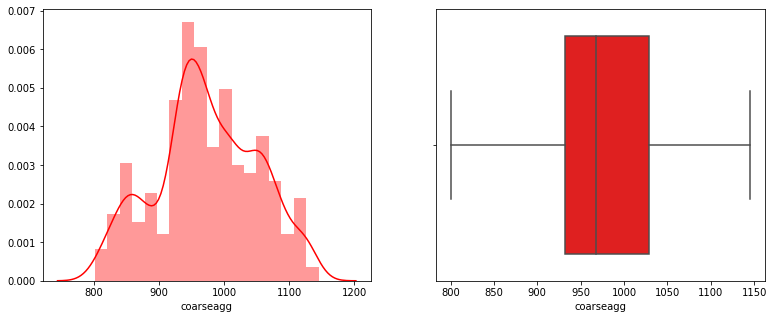

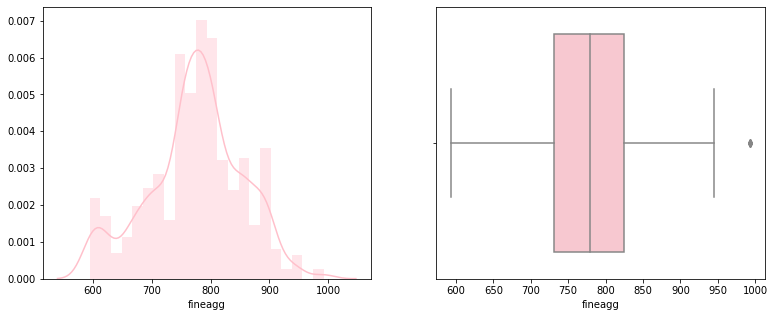

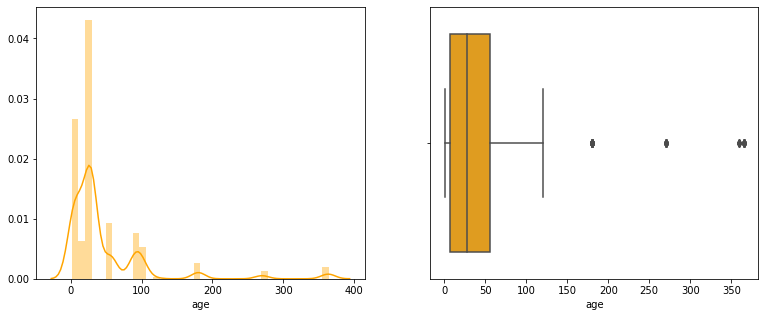

In [12]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["superplastic"], color = "yellow")
plt.subplot(1,3,2)
sn.boxplot(data["superplastic"], color = 'yellow')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["coarseagg"], color = "red")
plt.subplot(1,3,2)
sn.boxplot(data["coarseagg"], color = 'red')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["fineagg"], color = "pink")
plt.subplot(1,3,2)
sn.boxplot(data["fineagg"], color = 'pink')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sn.distplot(data["age"], color = "orange")
plt.subplot(1,3,2)
sn.boxplot(data["age"], color = 'orange')
plt.show()

### Observations

1. There are outliers present in age,fine aggregation, sureplastic, water and slag variables.
2. Except for age all other variables have outliers in control. Age seems to be completely right skewed with many outliers.

<Figure size 720x360 with 0 Axes>

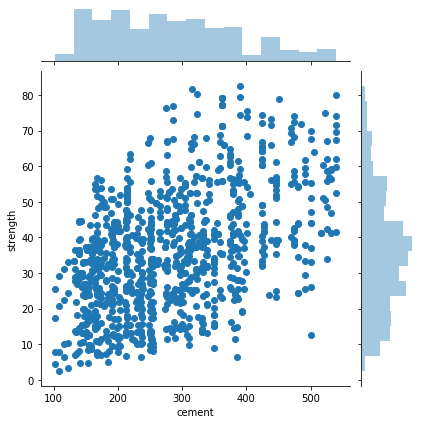

<Figure size 720x360 with 0 Axes>

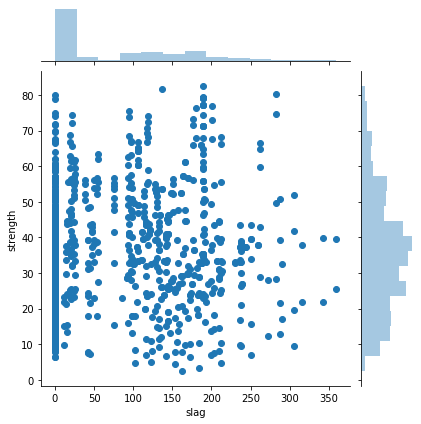

In [13]:
# relation of each variable with the output 
plt.figure(figsize = (10,5))
sn.jointplot(data['cement'], data['strength'])
plt.show()

plt.figure(figsize = (10,5))
sn.jointplot(data['slag'], data['strength'])
plt.show()





<Figure size 720x360 with 0 Axes>

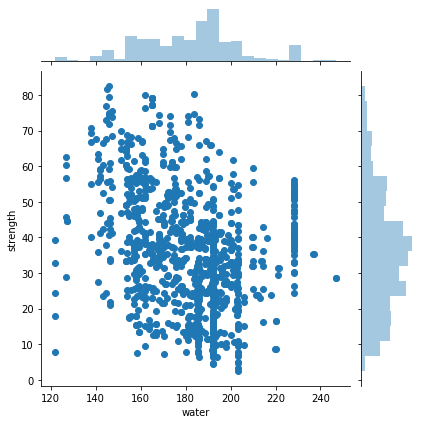

<Figure size 720x360 with 0 Axes>

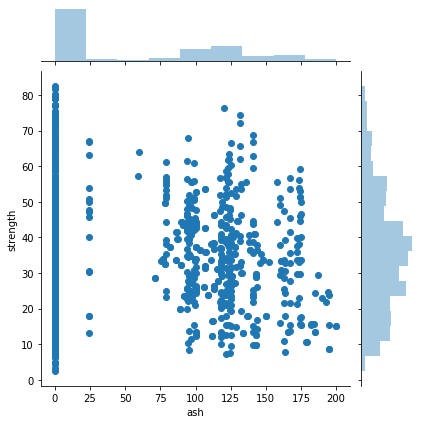

In [14]:
plt.figure(figsize = (10,5))
sn.jointplot(data['water'], data['strength'])
plt.show()

plt.figure(figsize = (10,5))
sn.jointplot(data['ash'], data['strength'])
plt.show()

<Figure size 720x360 with 0 Axes>

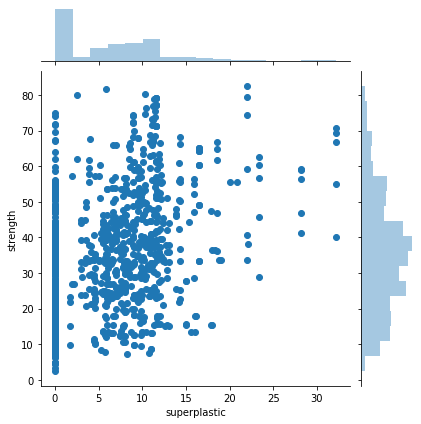

<Figure size 720x360 with 0 Axes>

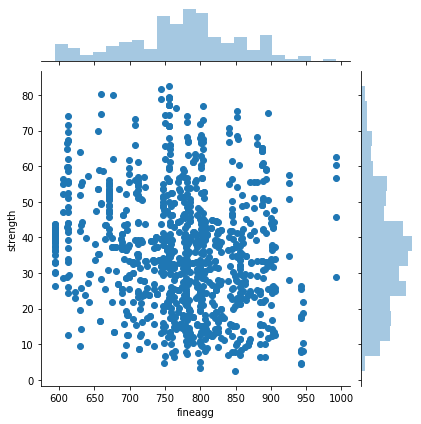

In [15]:

plt.figure(figsize = (10,5))
sn.jointplot(data['superplastic'], data['strength'])
plt.show()

plt.figure(figsize = (10,5))
sn.jointplot(data['fineagg'], data['strength'])
plt.show()



<Figure size 720x360 with 0 Axes>

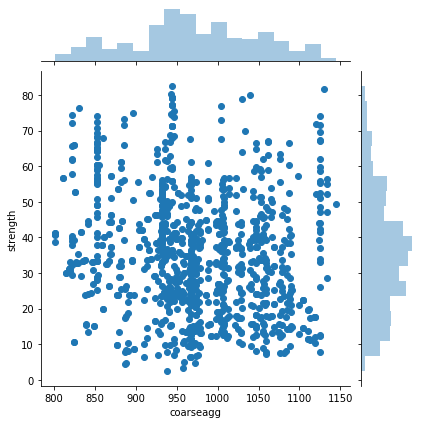

<Figure size 720x360 with 0 Axes>

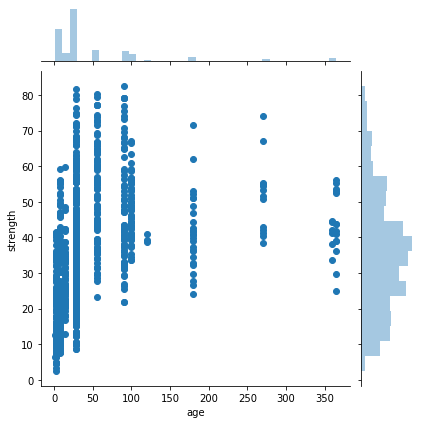

In [16]:
plt.figure(figsize = (10,5))
sn.jointplot(data['coarseagg'], data['strength'])
plt.show()

plt.figure(figsize = (10,5))
sn.jointplot(data['age'], data['strength'])
plt.show()

### Observations

1. It seems none of the variable hold any linear relation with the output variable

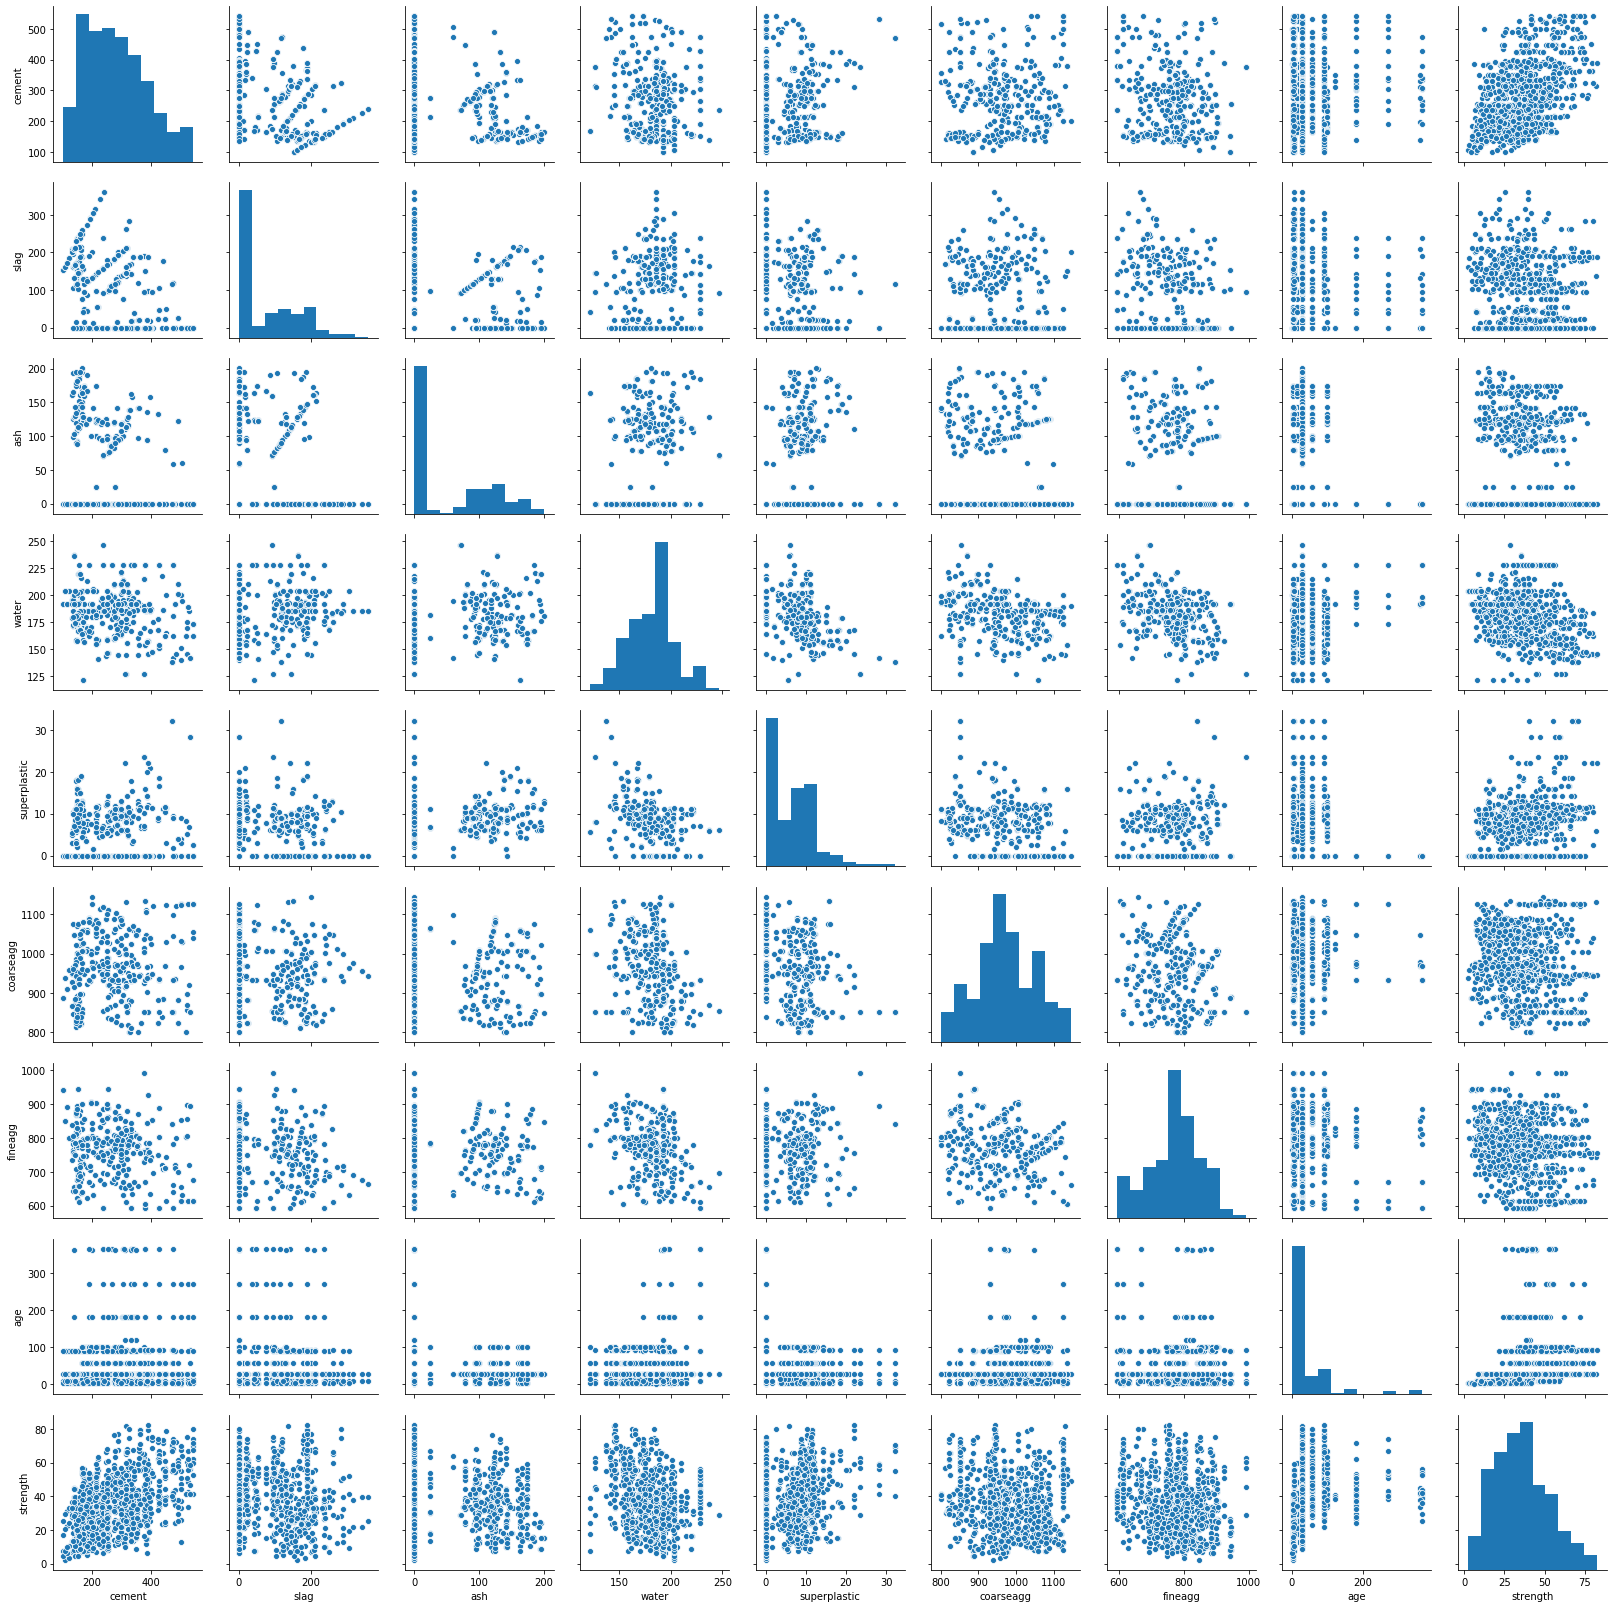

In [17]:
sn.pairplot(data)

### c. Strategies to address the different data challenges such as data pollution, outliers and missing values 

### Observations
1. There are no missing values in any field
2. Except for age variable, rest all have outliers in control.
3. None of the variables are linearly corelated to output variable strength

### 2. Deliverable -2 (Feature Engineering techniques) 

a. Identify opportunities (if any) to create a composite feature, drop a feature .

b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help.

c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength 

### 3. Deliverable -3  (create the model ) 

a. Obtain feature importance for the individual features using multiple methods and present your findings 

In [18]:
# intially building model using all 8 variables and will then remove the parameters based on its relation with output variable
X = data.drop('strength', axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28


In [19]:
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.6031487540630232
Accuracy in test:  0.6339136715208276


In [20]:
# Although the accuracy seems to be very less but atleast the model doesnot seems out to be an over fit model.

In [21]:
for idx, col_name in enumerate(xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for cement is 0.12655755592921442
The coefficient for slag is 0.10882841423627
The coefficient for ash is 0.09070514083244778
The coefficient for water is -0.10315724008090033
The coefficient for superplastic is 0.37612343073244076
The coefficient for coarseagg is 0.02402859496139713
The coefficient for fineagg is 0.0361928945601122
The coefficient for age is 0.11043496734221786


In [22]:
intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -52.963271158913074


In [23]:
# Now moving the model to a higher polynomial degree
# with degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(xtrain)
X_test2 = poly.fit_transform(xtest)
poly_clf = LinearRegression()
poly_clf.fit(X_train2, ytrain)
y_pred = poly_clf.predict(X_test2)

#In sample (training) R^2 will always improve with the number of variables!
print("Training Accuracy", poly_clf.score(X_train2, ytrain))
print("Test Accuracy ", poly_clf.score(X_test2, ytest))
print(xtrain.shape)
print(X_train2.shape)


Training Accuracy 0.7549578268848259
Test Accuracy  0.7444710081443828
(721, 8)
(721, 37)


In [24]:
# with degree 3

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(xtrain)
X_test2 = poly.fit_transform(xtest)
poly_clf = LinearRegression()
poly_clf.fit(X_train2, ytrain)
y_pred = poly_clf.predict(X_test2)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, ytrain))
print(poly_clf.score(X_test2, ytest))
print(xtrain.shape)
print(X_train2.shape)

0.8161697487188377
0.7199718847493843
(721, 8)
(721, 93)


In [25]:
# with degree 5

poly = PolynomialFeatures(degree=5, interaction_only=True)
X_train2 = poly.fit_transform(xtrain)
X_test2 = poly.fit_transform(xtest)
poly_clf = LinearRegression()
poly_clf.fit(X_train2, ytrain)
y_pred = poly_clf.predict(X_test2)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, ytrain))
print(poly_clf.score(X_test2, ytest))
print(xtrain.shape)
print(X_train2.shape)

0.8725568435701679
0.5665214609927287
(721, 8)
(721, 219)


### Observations
1. It seems with increasing polynomial degree the model becomes overfitt and also the implemetation cost also increases since it costs adding 37 variables instead of 8 parameters

In [26]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.6031487540630232
Accuracy in test:  0.6339136715208276


In [27]:
# lets drop age parameter and find if there is some increase in accuracy
X1 = data.drop(['strength', 'age'], axis = 1)
y1 = data['strength']

x1train, x1test, y1train, y1test = train_test_split(X1, y1, test_size = .3, random_state = 1)
model1 = LinearRegression()
model1.fit(x1train, y1train)
y1predict = model1.predict(x1train)
print("Accuracy in training : ", model1.score(x1train, y1train))
print("Accuracy in test: ", model1.score(x1test, y1test))

Accuracy in training :  0.44294607326544394
Accuracy in test:  0.446594865755968


In [28]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'cement'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.5168421933367342
Accuracy in test:  0.5796307919130579


In [29]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'ash'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.5834824112904885
Accuracy in test:  0.6163499757004015


In [30]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'slag'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.5588763704085419
Accuracy in test:  0.6012878163763941


In [31]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'water'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.6003810046673499
Accuracy in test:  0.6252463319447698


In [32]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'superplastic'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.5965336543421047
Accuracy in test:  0.6368983770986226


In [33]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'coarseagg'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.6005254830852713
Accuracy in test:  0.6348926848963617


In [34]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'fineagg'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.5985352255714852
Accuracy in test:  0.6420731313453394


In [35]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength', 'fineagg', 'coarseagg'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)
ypredict = model.predict(xtrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.5984760872830939
Accuracy in test:  0.6430666732478263


### Observation

Seeing the accuracy with all variables and even by excluding few variables is coming same. Hence variables like fineagg and coarseagg can be removed

## Now we can check the residuals for each predictor.

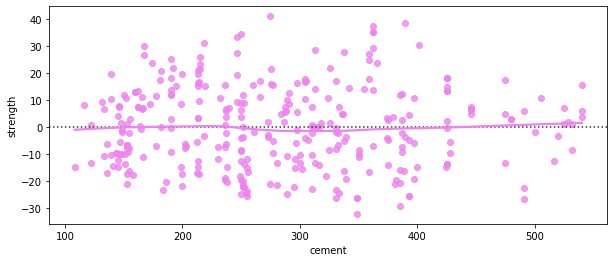

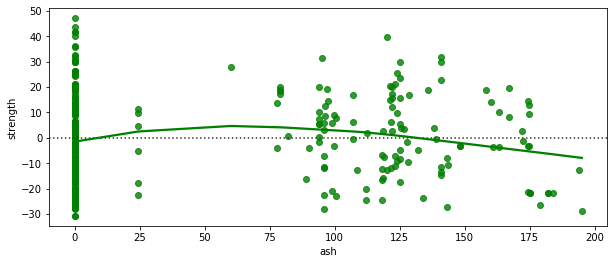

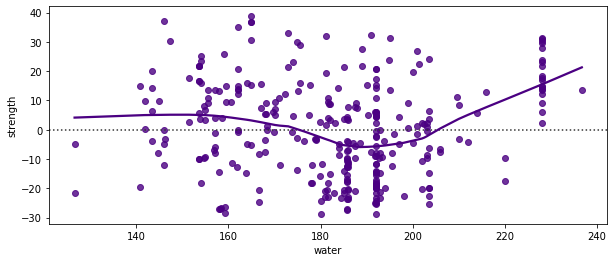

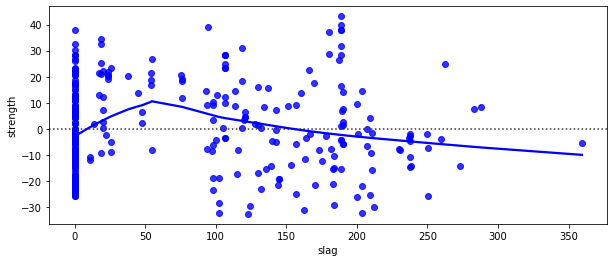

In [36]:
# lets try the same with rest of the variables to find out if there are anyvvariables that is not contributing to the accuracy of the model
X = data.drop(['strength'], axis = 1)
y = data['strength']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
xtrain.head()
model = LinearRegression()
model.fit(xtrain, ytrain)

fig = plt.figure(figsize=(10,4))
sn.residplot(x= xtest['cement'], y= ytest, color='violet', lowess=True )


fig = plt.figure(figsize=(10,4))
sn.residplot(x= xtest['ash'], y= ytest, color='green', lowess=True )

fig = plt.figure(figsize=(10,4))
sn.residplot(x= xtest['water'], y= ytest, color='indigo', lowess=True )


fig = plt.figure(figsize=(10,4))
sn.residplot(x= xtest['slag'], y= ytest, color='blue', lowess=True )

In [37]:
data_train = pd.concat([xtrain, ytrain], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91,64.90
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3,11.36
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7,32.82
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87


In [38]:
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -52.963271
cement           0.126558
slag             0.108828
ash              0.090705
water           -0.103157
superplastic     0.376123
coarseagg        0.024029
fineagg          0.036193
age              0.110435
dtype: float64

In [39]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          2.18e-137
Time:                        20:46:59   Log-Likelihood:                -2712.8
No. Observations:                 721   AIC:                             5444.
Df Residuals:                     712   BIC:                             5485.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -52.9633     31.085     -1.704   

In [40]:
## removed cement variable
lm1 = smf.ols(formula= 'strength ~ slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          3.37e-108
Time:                        20:47:01   Log-Likelihood:                -2783.8
No. Observations:                 721   AIC:                             5584.
Df Residuals:                     713   BIC:                             5620.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      279.4195     17.531     15.939   

In [41]:
# removed coarseagg
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+fineagg+age', data = data_train).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          1.75e-137
Time:                        20:47:02   Log-Likelihood:                -2715.2
No. Observations:                 721   AIC:                             5446.
Df Residuals:                     713   BIC:                             5483.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.5607     10.462      1.009   

### Observation

1. From the accuracy scores as well as from OLS results, we can say that variable coarseagg hardly impacts model accuracy. Lets get the final result from Ridge and Lasso

In [42]:
X = data.drop(['strength'], axis = 1)
y = data['strength']

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled)

In [43]:

                        
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y_scaled, test_size = .3, random_state = 1)
for idx, col_name in enumerate(xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for cement is 0.12655755592921442
The coefficient for slag is 0.10882841423627
The coefficient for ash is 0.09070514083244778
The coefficient for water is -0.10315724008090033
The coefficient for superplastic is 0.37612343073244076
The coefficient for coarseagg is 0.02402859496139713
The coefficient for fineagg is 0.0361928945601122
The coefficient for age is 0.11043496734221786


In [44]:
## Apply laso and ridge finally to see what all parameters are to be considred
ridge = Ridge(alpha=.2)
ridge.fit(xtrain,ytrain)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.7882357   0.55865025  0.34442188 -0.13419345  0.13450192  0.1094781
   0.17067542  0.41728697]]


In [45]:
lasso = Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099 -0.
 -0.          0.2543608 ]


In [46]:
# Lets check final score
model = LinearRegression()
model.fit(xtrain, ytrain)
print("Accuracy in training : ", model.score(xtrain, ytrain))
print("Accuracy in test: ", model.score(xtest, ytest))

Accuracy in training :  0.6031487540630229
Accuracy in test:  0.6339136715208273


In [47]:
print(ridge.score(xtrain, ytrain))
print(ridge.score(xtest, ytest))

0.6031469778446135
0.6339948097552128


In [48]:
print(lasso.score(xtrain, ytrain))
print(lasso.score(xtest, ytest))

0.5215627623725143
0.51856614888699


### 4. Deliverable -4 (Tuning the model)
a. Algorithms that you think will be suitable for this project.

b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit.

c. Model performance range at 95% confidence level 

In [49]:
#We have tried Linear regression, now lets see the performance by Random Forest
global rmf
X = data.drop(['strength'], axis = 1)
y = data['strength']


xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)
rf = RandomForestRegressor(n_estimators=50,random_state = 1)
rmf = rf.fit(xtrain, ytrain)

In [50]:
trainResult = rf.score(xtrain, ytrain)
testResult = rf.score(xtest, ytest)
print(trainResult)
print(testResult)

0.9812191733804964
0.9092517671082124


### Observation
Clearly random forest increases the accuracy of the model. Hence Random forest is better model for this approach

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### K-fold cross-validation

In [52]:
kfold = KFold(n_splits=10, random_state=50)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [53]:
results = cross_val_score(rmf,X, y, cv=kfold)
results

array([0.87667274, 0.89439007, 0.95269035, 0.91959518, 0.88659296,
       0.93658627, 0.93662554, 0.92785564, 0.91707006, 0.93411008])

In [54]:
mean_acc = np.mean(abs(results))
std = results.std()
print(f"With 95% confidence i can say my model accuracy will be in range of {round(mean_acc -2*std,2)} and {round(mean_acc +2*std,2)}")

With 95% confidence i can say my model accuracy will be in range of 0.87 and 0.97
